In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats

In [2]:
csvpath = "2014_SCC_EmissionInventory.csv"
emissions_df = pd.read_csv(csvpath)
emissions_df.head()

,EI Year,FIPS,COUNTY,Source Type,Category,SCC,Short Description,POLLUTANT,GROUP,EMISSIONS,EMISSIONS UNITS
0,2014,27001,AITKIN,Biogenic,Biogenic,2701200000,Biogenic - Vegetation - Total,Acetaldehyde,Air Toxic,433432.0,LB
1,2014,27003,ANOKA,Biogenic,Biogenic,2701200000,Biogenic - Vegetation - Total,Acetaldehyde,Air Toxic,89162.6,LB
2,2014,27005,BECKER,Biogenic,Biogenic,2701200000,Biogenic - Vegetation - Total,Acetaldehyde,Air Toxic,259204.0,LB
3,2014,27007,BELTRAMI,Biogenic,Biogenic,2701200000,Biogenic - Vegetation - Total,Acetaldehyde,Air Toxic,545036.0,LB
4,2014,27009,BENTON,Biogenic,Biogenic,2701200000,Biogenic - Vegetation - Total,Acetaldehyde,Air Toxic,90272.2,LB


In [3]:
array = ['ANOKA', 'CARVER', 'HENNEPIN', 'DAKOTA', 'RAMSEY',
        'SCOTT', 'WASHINGTON']
county_emissions_df = emissions_df.loc[emissions_df['COUNTY'].isin(array)]
county_emissions_df

,EI Year,FIPS,COUNTY,Source Type,Category,SCC,Short Description,POLLUTANT,GROUP,EMISSIONS,EMISSIONS UNITS
1,2014,27003,ANOKA,Biogenic,Biogenic,2701200000,Biogenic - Vegetation - Total,Acetaldehyde,Air Toxic,8.916260e+04,LB
9,2014,27019,CARVER,Biogenic,Biogenic,2701200000,Biogenic - Vegetation - Total,Acetaldehyde,Air Toxic,8.873140e+04,LB
18,2014,27037,DAKOTA,Biogenic,Biogenic,2701200000,Biogenic - Vegetation - Total,Acetaldehyde,Air Toxic,1.134812e+05,LB
26,2014,27053,HENNEPIN,Biogenic,Biogenic,2701200000,Biogenic - Vegetation - Total,Acetaldehyde,Air Toxic,9.434760e+04,LB
61,2014,27123,RAMSEY,Biogenic,Biogenic,2701200000,Biogenic - Vegetation - Total,Acetaldehyde,Air Toxic,3.741320e+04,LB
...,...,...,...,...,...,...,...,...,...,...,...
1046860,2014,27163,WASHINGTON,Nonroad,Ag Equipment,2270005060,Off-highway Diesel /Agricultural Equipt /Irrig...,Dibenzo(A-H)Anthracene,Air Toxic,1.258900e-04,LB
1046861,2014,27163,WASHINGTON,Nonroad,Ag Equipment,2270005060,Off-highway Diesel /Agricultural Equipt /Irrig...,1-2-3-4-7-8-9-Heptachlorodibenzofuran,Air Toxic,1.180000e-13,LB
1046862,2014,27163,WASHINGTON,Nonroad,Ag Equipment,2270005060,Off-highway Diesel /Agricultural Equipt /Irrig...,Benz(A)Anthracene,Air Toxic,1.321710e-03,LB
1046863,2014,27163,WASHINGTON,Nonroad,Ag Equipment,2270005060,Off-highway Diesel /Agricultural Equipt /Irrig...,2-3-4-7-8- Pentachlordibenzofuran,Air Toxic,1.770000e-10,LB


In [4]:
county_emissions_df = county_emissions_df.loc[county_emissions_df['POLLUTANT'] == 'Nitrogen Oxides']
county_emissions_df = county_emissions_df.drop(['EI Year', 'FIPS', 'Source  Type', 'Category', 'SCC ', 'Short Description', 'GROUP'], axis=1)
county_emissions_df

,COUNTY,POLLUTANT,EMISSIONS,EMISSIONS UNITS
349,ANOKA,Nitrogen Oxides,170539.0,LB
357,CARVER,Nitrogen Oxides,338306.0,LB
366,DAKOTA,Nitrogen Oxides,465306.0,LB
374,HENNEPIN,Nitrogen Oxides,207504.0,LB
409,RAMSEY,Nitrogen Oxides,64301.6,LB
...,...,...,...,...
828014,WASHINGTON,Nitrogen Oxides,0.0,LB
828195,WASHINGTON,Nitrogen Oxides,0.0,LB
828459,DAKOTA,Nitrogen Oxides,1340.0,LB
828460,SCOTT,Nitrogen Oxides,2060.0,LB


In [5]:
county_emissions_df = county_emissions_df.groupby(['COUNTY']).sum()
county_emissions_df

,EMISSIONS
COUNTY,
ANOKA,1.379785e+07
CARVER,3.938285e+06
DAKOTA,3.301977e+07
HENNEPIN,5.203227e+07
RAMSEY,2.159289e+07
SCOTT,7.005334e+06
WASHINGTON,1.416402e+07


In [6]:
county_emissions_df['EMISSIONS'] = county_emissions_df['EMISSIONS']/2000
county_emissions_df

,EMISSIONS
COUNTY,
ANOKA,6898.924168
CARVER,1969.142627
DAKOTA,16509.882878
HENNEPIN,26016.136503
RAMSEY,10796.446714
SCOTT,3502.666799
WASHINGTON,7082.007676


In [8]:
county_emissions_df = county_emissions_df.reset_index()
county_emissions_df.to_csv('emissions.csv')

In [8]:
life_path = 'life.csv'
life_df = pd.read_csv(life_path)
life_df = life_df.drop(['Unnamed: 0'], axis =1)
life_df['County'] = life_df['County'].str.replace("County, MN", "", case = False)
life_df

,County,Life Expectancy
0,Anoka,80.140260
1,Carver,82.370588
2,Dakota,80.683333
3,Hennepin,80.320438
4,Ramsey,79.533846
5,Scott,80.809524
6,Washington,81.847917


In [9]:
combined_df = pd.concat([life_df, county_emissions_df], axis=1)
combined_df = combined_df.drop(['COUNTY'], axis =1)
combined_df

,County,Life Expectancy,EMISSIONS
0,Anoka,80.140260,6898.924168
1,Carver,82.370588,1969.142627
2,Dakota,80.683333,16509.882878
3,Hennepin,80.320438,26016.136503
4,Ramsey,79.533846,10796.446714
5,Scott,80.809524,3502.666799
6,Washington,81.847917,7082.007676


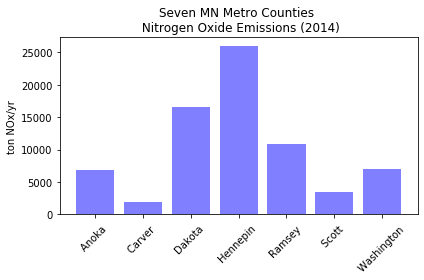

<Figure size 432x288 with 0 Axes>

In [10]:
x_axis = np.arange(len(combined_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, combined_df['EMISSIONS'], color ='b',alpha=0.5, align="center")
plt.xticks(tick_locations, combined_df['County'],rotation ='45')
plt.ylabel('ton NOx/yr')
plt.title('Seven MN Metro Counties \n Nitrogen Oxide Emissions (2014)')

fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('Emissions_barchart.png',dpi = 300)

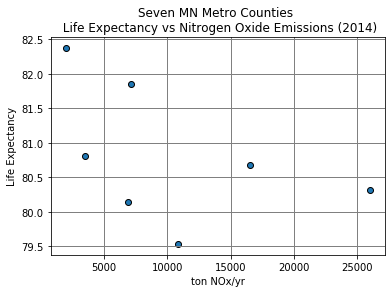

In [11]:
plt.scatter(combined_df['EMISSIONS'],combined_df['Life Expectancy'], edgecolors='black')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xlabel('ton NOx/yr')
plt.ylabel('Life Expectancy')
plt.title('Seven MN Metro Counties \n Life Expectancy vs Nitrogen Oxide Emissions (2014)')
plt.show()

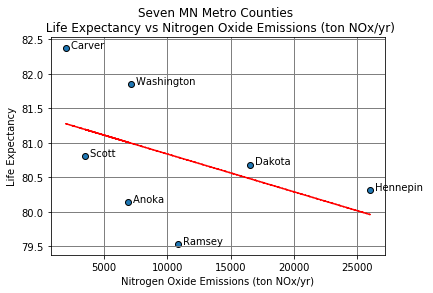

In [12]:
#perform linear regression
n_slope, n_int, n_r, n_p, n_std_err = stats.linregress(combined_df["EMISSIONS"],
                                                       combined_df['Life Expectancy'])
#regression equation line
n_fit = n_slope * combined_df["EMISSIONS"] + n_int
#line equation
line_eq = 'y =' + str(round(n_slope,4)) + "x +" + str(round(n_int,2))
# x,y and z variables for plot labels
x = combined_df["EMISSIONS"]
y = combined_df['Life Expectancy']
z = combined_df['County']
# scatter plot
fig, ax = plt.subplots()
plt.scatter(combined_df["EMISSIONS"],combined_df['Life Expectancy'], label=combined_df["County"], edgecolors="black")
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.plot(combined_df["EMISSIONS"],n_fit,"--",color="red")
# printing line equation on plot
plt.annotate(line_eq,xy=(5.1,81.25),fontsize=15,color='blue')
#for loop to print labels on the plots
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]), textcoords="offset points", # how to position the text
                 xytext=(5,0),ha='left')
# x and y labels and title
plt.xlabel("Nitrogen Oxide Emissions (ton NOx/yr)")
plt.ylabel("Life Expectancy")
plt.title("Seven MN Metro Counties \n Life Expectancy vs Nitrogen Oxide Emissions (ton NOx/yr)")
plt.show()
# saving plot to Home Page
fig.savefig('emissions.png',dpi=300)

In [13]:
print(f'The r-value is {round(n_r,5)}.')
print(f'The p-value is {round(n_p,5)}.')
print(f'The standard error is {round(n_std_err,5)}.')

The r-value is -0.46597.
The p-value is 0.29196.
The standard error is 5e-05.


Result:
There is no correlation between Nitrogen Oxide Emissions and Life Expectancy.